In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from useful_scit.imps import *
import flexpart_management.modules.FLEXOUT as FX
import flexpart_management.modules.constants as co
import flexpart_management.modules.flx_array as fa

reload


In [3]:
path = '/Volumes/mbProD/Downloads/flex_out/run_2019-06-02_20-42-05_/2017-12-10'

In [182]:
fd1 = FX.FLEXOUT('d01',path,'/tmp/')

/Volumes/mbProD/Downloads/flex_out/run_2019-06-02_20-42-05_/2017-12-10/*header_*d01*
/Volumes/mbProD/Downloads/flex_out/run_2019-06-02_20-42-05_/2017-12-10/header_d01.nc
/Volumes/mbProD/Downloads/flex_out/run_2019-06-02_20-42-05_/2017-12-10/*flxout_*d01*
['/Volumes/mbProD/Downloads/flex_out/run_2019-06-02_20-42-05_/2017-12-10/flxout_d01_20171206_000000.nc']


In [183]:
rel = 14 
dh = 24
lh = 96

In [184]:
ds = fd1.flexout_ds[{co.RL:rel}]
# ds.load();

In [185]:
ds1 = ds[{co.TIME:slice(rel-2,rel+lh+3)}]

In [186]:
lt = len(ds1[co.TIME])

In [187]:
rl = [] 
for i in range(lt):
    res = fa.data_array_to_logpolar(
        ds1[co.CONC][i,0,:],
        r_round_log=co.ROUND_R_LOG,
        th_round_rad=co.ROUND_TH_RAD,
        dim2keep=[co.ZM,co.TIME]

    )
    print(i)
    rl.append(res)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [188]:
dsL1 = xr.concat(rl[:],co.TIME)

In [189]:
fd2 = FX.FLEXOUT('d02',path,'/tmp/')

/Volumes/mbProD/Downloads/flex_out/run_2019-06-02_20-42-05_/2017-12-10/*header_*d02*
/Volumes/mbProD/Downloads/flex_out/run_2019-06-02_20-42-05_/2017-12-10/header_d02.nc
/Volumes/mbProD/Downloads/flex_out/run_2019-06-02_20-42-05_/2017-12-10/*flxout_*d02*
['/Volumes/mbProD/Downloads/flex_out/run_2019-06-02_20-42-05_/2017-12-10/flxout_d02_20171206_000000.nc']


In [190]:
rel = 14 
dh = 24
lh = 96

In [191]:
ds = fd2.flexout_ds[{co.RL:rel}]
# ds.load();

In [192]:
ds1 = ds[{co.TIME:slice(rel-2,rel+lh+3)}]

In [193]:
lt = len(ds1[co.TIME])

In [194]:
rl = [] 
for i in range(lt):
    res = fa.data_array_to_logpolar(
        ds1[co.CONC][i,0,:],
        r_round_log=co.ROUND_R_LOG,
        th_round_rad=co.ROUND_TH_RAD,
        dim2keep=[co.ZM,co.TIME]

    )
    print(i)
    rl.append(res)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [195]:
dsL2 = xr.concat(rl[:],co.TIME)

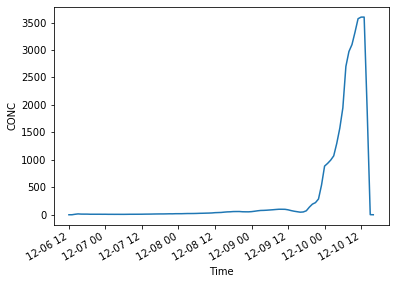

In [196]:
dsL2.sum(fa.get_dims_complement(dsL1,co.TIME)).plot()

In [197]:

def get_merged_ds(ds1,ds2):

    l2M = 24
    l2m = 10
    l1M = None
    l1m = 13
    d1 = ds1[{co.R_CENTER: slice(l1m, l1M)}]
    d2 = ds2[{co.R_CENTER: slice(l2m, l2M)}]
    mer = xr.merge([d1, d2])
    return mer


In [198]:
dl = get_merged_ds(dsL1,dsL2)

In [210]:
dp

<xarray.Dataset>
Dimensions:    (R_CENTER: 36, TH_CENTER: 36)
Coordinates:
  * R_CENTER   (R_CENTER) float64 0.05613 0.06721 0.08046 ... 21.33 25.53 30.57
  * TH_CENTER  (TH_CENTER) float64 0.08727 0.2618 0.4363 ... 5.847 6.021 6.196
    LAT        (R_CENTER, TH_CENTER) float64 -16.29 -16.3 -16.3 ... 13.18 14.1
    LON        (R_CENTER, TH_CENTER) float64 -68.08 -68.08 ... -38.6 -37.68
    LAT_00     (R_CENTER, TH_CENTER) float64 -16.3 -16.3 -16.3 ... 9.903 11.16
    LON_00     (R_CENTER, TH_CENTER) float64 -68.13 -68.12 ... -77.69 -72.98
    LAT_10     (R_CENTER, TH_CENTER) float64 -16.29 -16.29 ... 15.08 16.59
    LON_10     (R_CENTER, TH_CENTER) float64 -68.13 -68.12 ... -79.57 -73.94
    LAT_11     (R_CENTER, TH_CENTER) float64 -16.29 -16.29 -16.3 ... 16.59 17.1
    LON_11     (R_CENTER, TH_CENTER) float64 -68.12 -68.11 ... -73.94 -68.13
    LAT_01     (R_CENTER, TH_CENTER) float64 -16.3 -16.3 -16.31 ... 11.16 11.59
    LON_01     (R_CENTER, TH_CENTER) float64 -68.12 -68.11 ... -72

In [252]:
i=2
mm = dl[co.CONC].sum(co.TH_CENTER).quantile(.985).values
def plot_for_offset(i):
    r = 2
    fig = plt.figure(figsize=(7,7))
    llm = dl[co.CONC].where(dl[co.CONC]>0).sum(co.ZM).quantile(.99)
    ax1 = fig.add_subplot(2,2,1,projection=co.PROJ)
    fa.get_ax_bolivia(ax=ax1)
    dp = dl[{co.TIME:i}].sum(co.ZM)
    fa.logpolar_plot(dp,ax=ax1,perM=llm,quantile=False,colorbar=False)
    fa.plot_lapaz_rect(ax=ax1)
    fa.add_chc_lpb(ax1)
    ax2 = fig.add_subplot(2,2,2,projection=co.PROJ)
    fa.get_ax_lapaz(ax=ax2)
    dp = dl[{co.TIME:i}].sum(co.ZM)
    fa.logpolar_plot(dp,ax=ax2,perM=llm,quantile=False,colorbar=True)
    fa.add_chc_lpb(ax2)
    ax = fig.add_subplot(r,1,r)
    fa.plot_clust_height(dl[{co.TIME:i}][co.CONC],ax=ax,perM=mm,quantile=False,par_to_plot=co.CONC)
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close(fig)

    return image




In [258]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import imageio
kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('./powers.gif', [plot_for_offset(i) for i in range(98,3,-1)], fps=2.5)

array(60.50542049)